In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_performance(metric, analysis_type, has_random=True): #analysis_type = missingness or noisiness
    metric_dict = metrics_dict[metric]
    df= pd.DataFrame()
    if analysis_type == 'noisiness':
         df[analysis_type] = [0, 0.2, 0.4, 0.6]
    elif analysis_type == 'missingness':
        df[analysis_type] = [0, 0.1, 0.2, 0.3]
    else:
        print('Unknown analysis type')
        return
    if has_random:
        df['random agent'] = metric_dict['random agent']
    #df['dt agent'] = metric_dict['dt agent']
    df['DQN'] = metric_dict['dqn agent']
    df['RF'] = metric_dict['random forest']
    df['SVM'] = metric_dict['SVM']
    df['XGBoost'] = metric_dict['XGBoost']
    df['DT'] = metric_dict['decision tree']
    #if metric not in ['episode_length', 'episode_reward']:
    #    df['decision tree'] = metric_dict['decision tree']
    
    plt.title(metric)
    plt.ylabel(metric)
    sns.lineplot(x=analysis_type, y='value', hue='variable', 
             data=pd.melt(df, [analysis_type]))
    

In [3]:
def pretty_plot_performance(analysis_type, success_dict, filename, has_random=True):
    if analysis_type == 'Noisiness':
        xticks = [0.0, 0.2, 0.4, 0.6]
    else:
        xticks = [0.0, 0.1, 0.2, 0.3]
    df = pd.DataFrame()
    df['DQN'] = success_dict['dqn agent']
    df['RF'] = success_dict['random forest']
    df['SVM'] = success_dict['SVM']
    df['XGBoost'] = success_dict['XGBoost']
    df['DT'] = success_dict['decision tree']
    plt.figure(figsize=(8, 5))
    ax = sns.lineplot(data=df, linewidth=2.5)
    ax.set_xticks(range(len(df))) # <--- set the ticks first
    ax.set_xticklabels(xticks)
    ax.set(xlabel=analysis_type, ylabel='Success Rate', title='Model Performance')
    ax.legend(title='Models', title_fontsize = 13)
    plt.savefig(f'../../final/images/{filename}.png')
    plt.show()

### Noisiness

In [4]:
noisiness_dict = {'decision tree': [99.943, 85.264, 82.900, 79.900], 
                  'dqn agent': [95.000, 96.243, 97.269, 96.621], 
                  'random forest': [99.907, 98.757, 96.736, 94.986], 
                  'SVM':[83.771, 75.207, 73.157, 72.157], 
                  'XGBoost':[99.986, 98.607, 96.728, 95.086]}

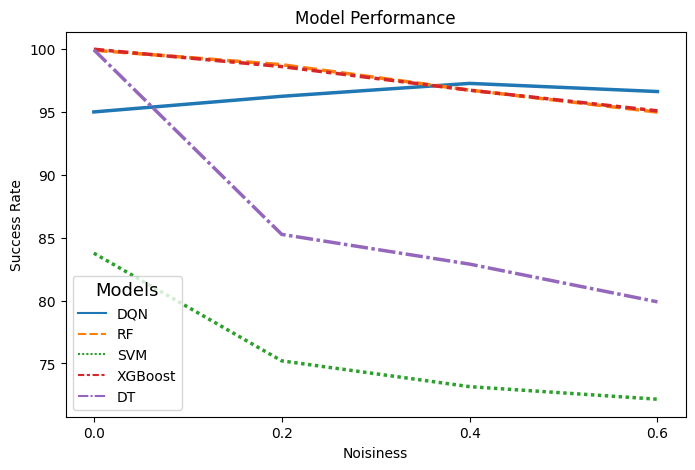

In [5]:
pretty_plot_performance('Noisiness', noisiness_dict, 'plot_noisiness', False)

### Missingness 

In [6]:
missingness_dict = {'decision tree': [99.943, 95.386, 93.893, 93.221], 
                    'dqn agent': [95.000, 96.714, 94.150, 94.357], 
                    'random forest': [99.907, 97.186, 93.193, 91.200], 
                    'SVM':[83.771, 63.721, 54.007, 51.314], 
                    'XGBoost':[99.986, 97.829, 93.821, 91.521]}

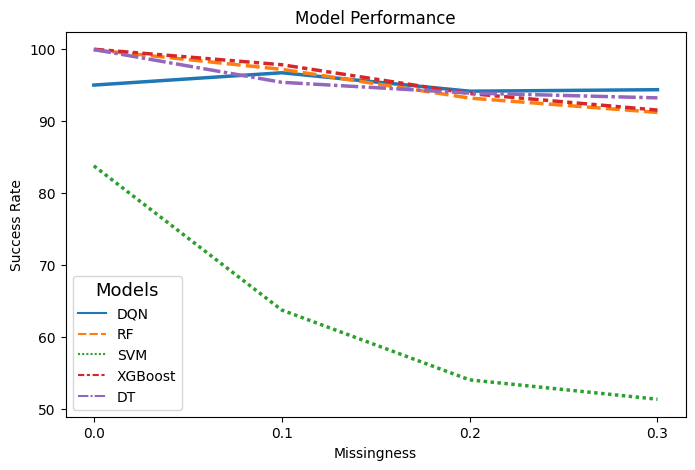

In [7]:
pretty_plot_performance('Missingness', missingness_dict, 'plot_missingness', False)

### Constant noise (0.4) and varying missingness

In [8]:
noisiness_missingness_dict = {'decision tree': [99.943, 81.250, 79.129, 77.036], 
                              'dqn agent': [95.000, 94.529, 92.064, 89.779], # This 91 is a placeholder
                              'random forest': [99.907, 95.029, 92.379, 90.736], 
                              'SVM':[83.771, 57.664, 48.671, 46.185], 
                              'XGBoost':[99.986, 95.286, 92.507, 90.679]}

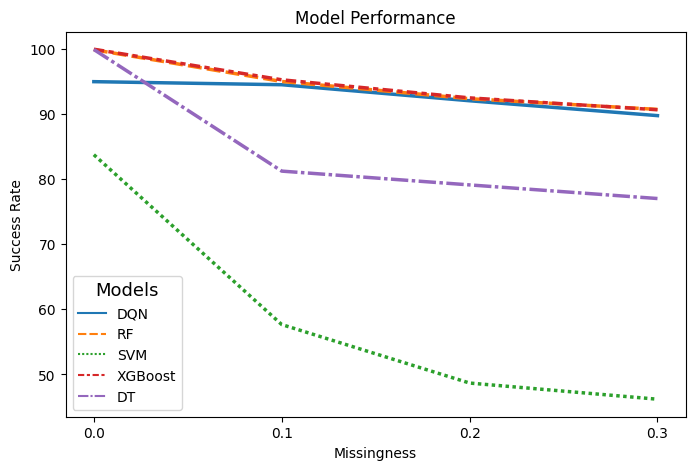

In [9]:
pretty_plot_performance('Missingness', noisiness_missingness_dict, 'plot_const_noise_var_miss', False)

### Varying noise + constant missingness (0.3)

In [10]:
var_noise_const_miss_dict = {'decision tree': [99.943, 79.235, 77.036, 74.321], 
                             'dqn agent': [95.000, 88.543, 89.779, 78.121], 
                             'random forest': [99.907, 91.179, 90.736, 90.286], 
                             'SVM':[83.771, 47.029, 46.185, 45.186], 
                             'XGBoost':[99.986, 91.057, 90.679, 90.050]}

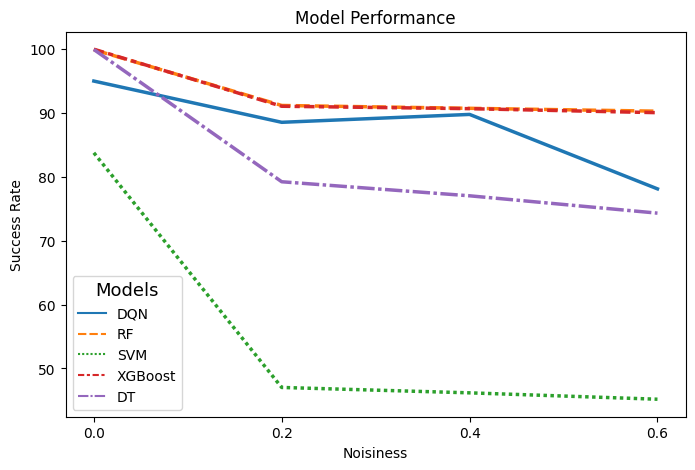

In [11]:
pretty_plot_performance('Noisiness', var_noise_const_miss_dict, 'plot_var_noise_const_miss', False)

### Variable training sizes

In [12]:
sizes = [1, 0.5, 0.1, 0.05, 0.1]
variable_success_rates_6m = [95.000, 90.942, 93.829, 91.550, 79.350]
variable_df = pd.DataFrame()
#variable_df['training set size'] = sizes
variable_df['Success Rate'] = variable_success_rates_6m

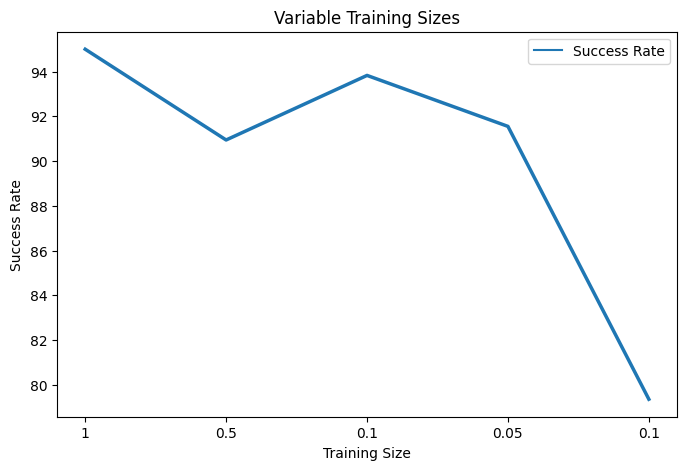

In [13]:
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=variable_df, linewidth=2.5)
ax.set_xticks(range(len(variable_df))) # <--- set the ticks first
ax.set_xticklabels(sizes)
ax.set(xlabel='Training Size', ylabel='Success Rate', title='Variable Training Sizes')
#ax.legend(title='Models', title_fontsize = 13)
plt.savefig(f'../../final/images/varied_training_size_6m.png')
plt.show()

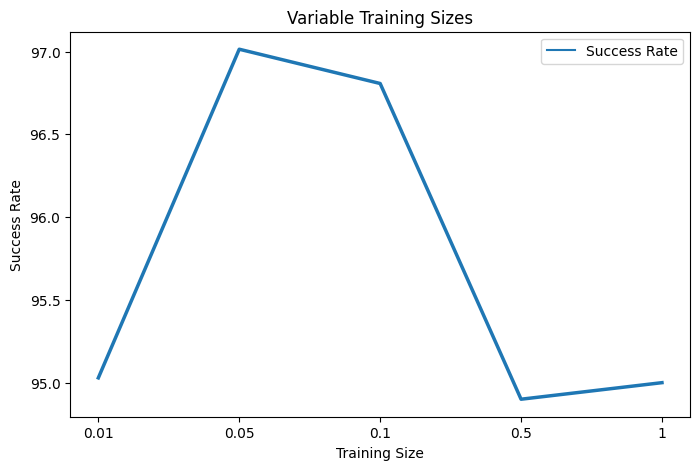

In [14]:
#sizes = [1, 0.5, 0.1, 0.05, 0.01]
sizes = [0.01, 0.05, 0.1, 0.5, 1]
#variable_success_rates_opt = [95.000, 94.900, 96.807, 97.014, 95.029]
variable_success_rates_opt = [95.029, 97.014, 96.807, 94.900, 95.000]
variable_opt_df = pd.DataFrame()
#variable_df['training set size'] = sizes
variable_opt_df['Success Rate'] = variable_success_rates_opt
plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=variable_opt_df, linewidth=2.5)
ax.set_xticks(range(len(variable_opt_df))) # <--- set the ticks first
ax.set_xticklabels(sizes)
ax.set(xlabel='Training Size', ylabel='Success Rate', title='Variable Training Sizes')
#ax.legend(title='Models', title_fontsize = 13)
plt.savefig(f'../../final/images/varied_training_size_opt.png')
plt.show()